## Table of content and model results




### UCI data alone

#### Baseline

W2V + CNN

> train data: accuracy = 0.9646, precision = 0.8825, recall = 0.8613, f1 = 0.8718
>
> test data: accuracy = 0.9209, precision = 0.7619, recall = 0.7044, f1 = 0.7320

W2V + LSTM model

> train data: accuracy = 0.9362, precision = 0.7766, recall = 0.7620, f1 = 0.7692
>
> test data: accuracy = 0.9354, precision = 0.8151, recall = 0.7484, f1 = 0.7803
>
BERT

> train data: accuracy = 0.9688, precision = 0.8240, recall = 0.9711, f1 = 0.8915
>
> test data: accuracy = 0.9525, precision = 0.7650, recall = 0.9623, f1 = 0.8524

BERT + CNN
>train data: : accuracy = 0.9821, precision = 0.8908, recall = 0.9847, f1 = 0.9354
>
>test data: : accuracy = 0.9695, precision = 0.8453, recall = 0.9623, f1 = 0.9000

#### Tuned

BERT 3 epochs

> train data: : accuracy = 0.9879, precision = 0.9377, recall = 0.9728, f1 = 0.9549
>
> test data: : accuracy = 0.9803, precision = 0.9202, recall = 0.9434, f1 = 0.9317

BERT 3e + FCN unfreeze
>train data: accuracy = 0.9987, precision = 1.0000, recall = 0.9898, f1 = 0.9949
>
>test data: accuracy = 0.9919, precision = 0.9870, recall = 0.9560, f1 = 0.9712


BERT 5e + FCN unfreeze, 
>train data: : accuracy = 0.9996, precision = 0.9966, recall = 1.0000, f1 = 0.9983
>
>test data: : accuracy = 0.9901, precision = 0.9625, recall = 0.9686, f1 = 0.9655


BERT + CNN, 
>train data: : accuracy = 0.9960, precision = 0.9703, recall = 1.0000, f1 = 0.9849
>
>test data: : accuracy = 0.9874, precision = 0.9290, recall = 0.9874, f1 = 0.9573


BERT 3e + CNN kernel
>train data: : accuracy = 0.9991, precision = 1.0000, recall = 0.9932, f1 = 0.9966
>
>test data: : accuracy = 0.9928, precision = 0.9809, recall = 0.9686, f1 = 0.9747

## Imports

In [ ]:
!pip install gensim==3.8.3 --quiet

     |████████████████████████████████| 24.2 MB 1.6 MB/s 


In [ ]:
!pip install transformers --quiet

     |████████████████████████████████| 4.7 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 66.0 MB/s 
     |████████████████████████████████| 101 kB 9.2 MB/s 
     |████████████████████████████████| 6.6 MB 48.3 MB/s 


In [ ]:
!pip install -U tensorflow-text==2.8.2 --quiet

     |████████████████████████████████| 4.9 MB 4.1 MB/s 


In [ ]:
# misc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

# report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

# word2vec
import nltk
import gensim
from nltk.data import find
import tensorflow_text as tf_text

# BERT
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Embedding, Input, Dense, Lambda
from tensorflow.keras.models import Model
from transformers import BertTokenizer, TFBertModel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load and clean data

In [ ]:
# convert labels to ints function
def label_to_int(data):
  data['spam'][data['spam'] == 'ham'] = 0
  data['spam'][data['spam'] == 'spam'] = 1
  return data

In [ ]:
# # read in lines because it's a txt file seprated by \t
# file = open("/content/drive/MyDrive/W266: SMS Spam Detection Final Project/data/SMSSpamCollection", "r")
# lines = file.readlines()
# texts = []
# for line in lines:
#     texts.append(line.split("\t"))
# uci_data = pd.DataFrame(data=texts, columns=["spam", "text"])

# # convert labels to ints
# uci_data = label_to_int(uci_data)

In [ ]:
# preview
# uci_data

In [ ]:
# rename uci data to just data
data = pd.read_csv("/content/drive/MyDrive/W266: SMS Spam Detection Final Project/data/data_clean_trans.csv")
data

,Unnamed: 0,spam,text,crowd,spanish,language,english
0,0,0,"Go until jurong point, crazy.. Available only ...",0,"Vaya hasta Jurong Point, loco ... disponible s...",en,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...\n,0,Ok lar ... bromeando wif u oni ...\n,en,Ok lar... Joking wif u oni...\n
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,Entrada gratuita en 2 una compensación de wkly...,en,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...,0,No digo tan temprano hor ... ya c ya digo ...\n,en,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro...",0,"No, no creo que vaya a la USF, aunque vive por...",en,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...
6102,6102,1,You have passed the official certification onl...,1,Ha aprobado la certificación oficial de la aud...,en,You have passed the official certification onl...
6103,6103,1,"Win The Big J@CKP0T Up To 1M PHP! 100 GET 100,...",1,¡Gana la gran j@ckp0t hasta 1 m php! 100 Get 1...,en,"Win The Big J@CKP0T Up To 1M PHP! 100 GET 100,..."
6104,6104,1,"Hi, I'm a Shopee Hiring Manager and I'm curren...",1,"Hola, soy un gerente de contratación de Shopee...",en,"Hi, I'm a Shopee Hiring Manager and I'm curren..."
6105,6105,1,"4 PCS SOLAR LIGHTS FOR ONLY 1,499 !\nPinaka mu...",1,"¡4 PCS Luces solares por solo 1,499!\n¡La mayo...",fil,"4 pcs solar lights for only 1,499!\nMost cheap..."


In [ ]:
data = data.convert_dtypes()
data.dtypes

Unnamed: 0     Int64
spam           Int64
text          string
crowd          Int64
spanish       string
language      string
english       string
dtype: object

In [ ]:
# remove crowdsourced text messages
data = data[data['crowd'] == 0]
data

,Unnamed: 0,spam,text,crowd,spanish,language,english
0,0,0,"Go until jurong point, crazy.. Available only ...",0,"Vaya hasta Jurong Point, loco ... disponible s...",en,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...,0,Ok lar ... bromeando wif u oni ...,en,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,Entrada gratuita en 2 una compensación de wkly...,en,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...,0,No digo tan temprano hor ... ya c ya digo ...,en,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro...",0,"No, no creo que vaya a la USF, aunque vive por...",en,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...
5569,5569,1,This is the 2nd time we have tried 2 contact u...,0,Esta es la segunda vez que hemos probado 2 con...,en,This is the 2nd time we have tried 2 contact u...
5570,5570,0,Will ü b going to esplanade fr home?,0,¿Ü B irá a Explanade Fr Home?,en,Will ü b going to esplanade fr home?
5571,5571,0,"Pity, * was in mood for that. So...any other s...",0,"Lástima, * estaba de humor para eso. Entonces ...",en,"Pity, * was in mood for that. So...any other s..."
5572,5572,0,The guy did some bitching but I acted like i'd...,0,"El tipo hizo un poco de perra, pero actué como...",en,The guy did some bitching but I acted like i'd...


## EDA

In [ ]:
sum(data["spam"] == 1)

747

In [ ]:
sum(data["spam"] == 0)

4827

In [ ]:
# TO-DO: possibly implement SMOTE
# https://fatemerhmi.github.io/files/Classification_of_imbalanced_dataset_using_BERT_embedding.pdf

## Split the data

In [ ]:
# TO-DO: data is unbalanced we may need to fix it
X, y = data['text'], data['spam']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    shuffle=True)

## Helper functions

In [ ]:
def print_metrics(test_name, y_true, y_pred):
    print('%s: accuracy = %.4f, precision = %.4f, recall = %.4f, f1 = %.4f'
          % (test_name,
             metrics.accuracy_score(y_true, y_pred),
             metrics.precision_score(y_true, y_pred),
             metrics.recall_score(y_true, y_pred),
             metrics.f1_score(y_true, y_pred)))

## Base models

- Word2Vec embeddings
  - CNN
  - LSTM

- BERT embeddings
  - Fully connected network
  - CNN


#### Word2Vec embeddings

In [ ]:
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Unzipping models/word2vec_sample.zip.


True

In [ ]:
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [ ]:
# creating a Word2Vec embedding
EMBEDDING_DIM = len(model['university'])      # we know... it's 300

# initialize embedding matrix and word-to-id map:
embedding_matrix = np.zeros((len(model.vocab.keys()) + 1, EMBEDDING_DIM))       
vocab_dict = {}

# build the embedding matrix and the word-to-id map:
for i, word in enumerate(model.vocab.keys()):
    embedding_vector = model[word]
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        vocab_dict[word] = i



In [ ]:
tokenizer = tf_text.WhitespaceTokenizer()
train_tokens = tokenizer.tokenize(train_X)
test_tokens = tokenizer.tokenize(test_X)

In [ ]:
train_tokens[0]

<tf.Tensor: shape=(22,), dtype=string, numpy=
array([b'Double', b'mins', b'and', b'txts', b'4', b'6months', b'FREE',
       b'Bluetooth', b'on', b'Orange.', b'Available', b'on', b'Sony,',
       b'Nokia', b'Motorola', b'phones.', b'Call', b'MobileUpd8', b'on',
       b'08000839402', b'or', b'call2optout/N9DX'], dtype=object)>

In [ ]:
# TO-DO: make sure this is tuned
MAX_SEQUENCE_LENGTH = 5

In [ ]:
def sents_to_ids(token_list_list, label_list, num_examples=100000000):
    """
    converting a list of strings to a list of lists of word ids
    """
    text_ids = []
    text_labels = []
    example_count = 0
    use_token_list_list = token_list_list[:num_examples]
    for i, token_list in enumerate(use_token_list_list):
        if i < num_examples:
            try:
                example = []
                for token in list(token_list.numpy()):
                    decoded = token.decode('utf-8').replace('.','').replace(',','').replace('!','')
                    try:
                        example.append(vocab_dict[decoded])
                        
                    except:
                        example.append(43981)
                if len(example) >= MAX_SEQUENCE_LENGTH:
                    text_ids.append(example[:MAX_SEQUENCE_LENGTH])
                    text_labels.append(label_list[i])
                    if example_count % 5000 == 0:
                        print('Examples processed: ', example_count)
                    example_count += 1
                else:
                    pass
            except:
                pass

    
    print('Number of examples retained: ', example_count) 
    return (np.array(text_ids),   np.array(text_labels)) 

In [ ]:
# TO-DO: reaname
# this is used here and in the BERT model
y_train = tf.convert_to_tensor(list(train_y))
y_test = tf.convert_to_tensor(list(test_y))

In [ ]:
train_input, train_input_labels = sents_to_ids(train_tokens, y_train)
test_input, test_input_labels = sents_to_ids(test_tokens, y_test)

Examples processed:  0
Number of examples retained:  4183
Examples processed:  0
Number of examples retained:  1037


#### CNN

In [ ]:
cnn_embedding_layer = Embedding(embedding_matrix.shape[0],
                            embedding_matrix.shape[1],
                            embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
# Specify model hyperparameters.
epochs = 10
num_filters = [3, 2, 1]
kernel_sizes = [2, 4, 5]
dense_layer_dims = [100, 30]
dropout_rate = 0.5

In [ ]:
cnn_input_layer = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int64')

In [ ]:
cnn_embeddings = cnn_embedding_layer(cnn_input_layer)

h = cnn_embeddings

In [ ]:
conv_layers_for_all_kernel_sizes = []
for kernel_size, filters in zip(kernel_sizes, num_filters):
    conv_layer = keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(h)
    conv_layer = keras.layers.GlobalMaxPooling1D()(conv_layer)
    conv_layers_for_all_kernel_sizes.append(conv_layer)

In [ ]:
h = keras.layers.concatenate(conv_layers_for_all_kernel_sizes, axis=1)

In [ ]:
h = keras.layers.Dropout(rate=dropout_rate)(h)

In [ ]:
for dense_layer_dim in dense_layer_dims:  
    h = keras.layers.Dense(dense_layer_dim, activation='relu')(h)

In [ ]:
cnn_prediction = keras.layers.Dense(1, activation='sigmoid')(h)

In [ ]:
cnn_model = keras.Model(inputs=cnn_input_layer, outputs=cnn_prediction)
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 5, 300)       13194600    ['input_6[0][0]']                
                                                                                                  
 conv1d_11 (Conv1D)             (None, 4, 3)         1803        ['embedding_5[0][0]']            
                                                                                                  
 conv1d_12 (Conv1D)             (None, 2, 2)         2402        ['embedding_5[0][0]']            
                                                                                            

In [ ]:
cnn_history = cnn_model.fit(train_input,
             np.array(train_input_labels),
             validation_data=(test_input, np.array(test_input_labels)),
             batch_size=32,
             epochs=5
             )

Epoch 1/5
131/131 [==============================] - 1s 6ms/step - loss: 0.2222 - accuracy: 0.9068 - val_loss: 0.2416 - val_accuracy: 0.9122
Epoch 2/5
131/131 [==============================] - 1s 5ms/step - loss: 0.2097 - accuracy: 0.9154 - val_loss: 0.2395 - val_accuracy: 0.9171
Epoch 3/5
131/131 [==============================] - 1s 5ms/step - loss: 0.1927 - accuracy: 0.9245 - val_loss: 0.2356 - val_accuracy: 0.9132
Epoch 4/5
131/131 [==============================] - 1s 5ms/step - loss: 0.1901 - accuracy: 0.9252 - val_loss: 0.2388 - val_accuracy: 0.9161
Epoch 5/5
131/131 [==============================] - 1s 5ms/step - loss: 0.1788 - accuracy: 0.9316 - val_loss: 0.2205 - val_accuracy: 0.9209


##### Train report

In [ ]:
dev_pred = cnn_model.predict(train_input)

In [ ]:
test_pred = cnn_model.predict(test_input)

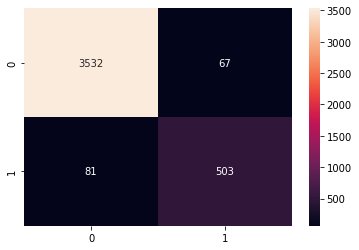

In [ ]:
# TO-DO: not sure if rounding is the right way?

sns.heatmap(confusion_matrix(np.array(train_input_labels), np.round(dev_pred,0)), annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('W2V + CNN, train data: ', np.array(train_input_labels), np.round(dev_pred,0))

W2V + CNN, train data: : accuracy = 0.9646, precision = 0.8825, recall = 0.8613, f1 = 0.8718


In [ ]:
# TO-DO can't analyze because some texts were discarded during conversion to ids

train_y = train_input_labels
train_y_predict = np.round(dev_pred,0)

##### Test report

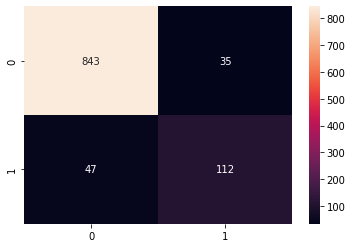

In [ ]:
sns.heatmap(confusion_matrix(np.array(test_input_labels), np.round(test_pred,0)), annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('W2V + CNN, test data: ', np.array(test_input_labels), np.round(test_pred,0))

W2V + CNN, test data: : accuracy = 0.9209, precision = 0.7619, recall = 0.7044, f1 = 0.7320


#### LSTM

In [ ]:
rnn_embedding_layer = Embedding(embedding_matrix.shape[0],
                                embedding_matrix.shape[1],
                                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)

In [ ]:
def build_classificaiton_rnn_model(rnn_dim):
  """
  max_length:         maximum input length
  rnn_dim:            dimension of the rnn 
  return_sequences:   should the output vectors get returned?  
  return_state:       should the final cell states get returned?
  """
  
  rnn_input_layer = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int64')

  rnn_embeddings = rnn_embedding_layer(rnn_input_layer)

  # only return the last output from the RNN calculation 
  rnn_output = tf.keras.layers.LSTM(rnn_dim, return_sequences=False, return_state=False, name='LSTM')\
              (rnn_embeddings)

  rnn_hidden = tf.keras.layers.Dense(100, activation='relu', name='rnn_hidden')(rnn_output)


  rnn_classification = tf.keras.layers.Dense(1, 
                                            activation='sigmoid', 
                                            name='rnn_classification')(rnn_hidden)

  # model definition

  rnn_model = tf.keras.models.Model(inputs=rnn_input_layer, outputs=[rnn_classification])

  rnn_model.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,
                                                  beta_1=0.9,
                                                  beta_2=0.999,
                                                  epsilon=1e-07,
                                                  amsgrad=False,
                                                  name='Adam'),
                  metrics='accuracy')
    
  return rnn_model

In [ ]:
rnn_model = build_classificaiton_rnn_model(rnn_dim=3)

In [ ]:
rnn_history = rnn_model.fit(train_input,
             np.array(train_input_labels),
             validation_data=(test_input, np.array(test_input_labels)),
             batch_size=32,
              epochs=5
             )

Epoch 1/5
131/131 [==============================] - 4s 10ms/step - loss: 0.4401 - accuracy: 0.8563 - val_loss: 0.3573 - val_accuracy: 0.8467
Epoch 2/5
131/131 [==============================] - 1s 5ms/step - loss: 0.3002 - accuracy: 0.8671 - val_loss: 0.2721 - val_accuracy: 0.8910
Epoch 3/5
131/131 [==============================] - 1s 5ms/step - loss: 0.2390 - accuracy: 0.9111 - val_loss: 0.2286 - val_accuracy: 0.9286
Epoch 4/5
131/131 [==============================] - 1s 4ms/step - loss: 0.2111 - accuracy: 0.9242 - val_loss: 0.2065 - val_accuracy: 0.9364
Epoch 5/5
131/131 [==============================] - 1s 5ms/step - loss: 0.1955 - accuracy: 0.9357 - val_loss: 0.2030 - val_accuracy: 0.9354


In [ ]:
dev_pred = rnn_model.predict(train_input)
test_pred = rnn_model.predict(test_input)

##### Train report

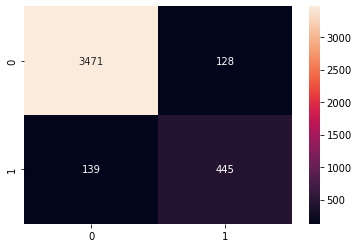

In [ ]:
sns.heatmap(confusion_matrix(np.array(train_input_labels), np.round(dev_pred,0)), annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('W2V + LSTM model, train data: ', np.array(train_input_labels), np.round(dev_pred,0))

W2V + LSTM model, train data: : accuracy = 0.9362, precision = 0.7766, recall = 0.7620, f1 = 0.7692


##### Test report

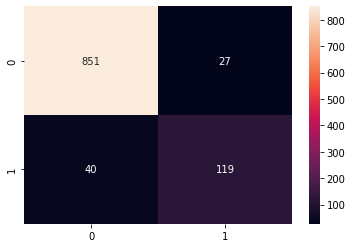

In [ ]:
sns.heatmap(confusion_matrix(np.array(test_input_labels), np.round(test_pred,0)), annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('W2V + LSTM model, test data: ', np.array(test_input_labels), np.round(test_pred,0))

W2V + LSTM model, test data: : accuracy = 0.9354, precision = 0.8151, recall = 0.7484, f1 = 0.7803


#### BERT

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
max_length = 100              # set max_length


all_train_examples = list(train_X)
all_test_examples = list(test_X)


x_train = bert_tokenizer(all_train_examples, 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_train = tf.convert_to_tensor(list(train_y))

x_test = bert_tokenizer(all_test_examples, 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_test = tf.convert_to_tensor(list(test_y))

In [ ]:
def create_bert_pooled_model(train_layers=-1,
                          hidden_size = 100, 
                          dropout=0.3,
                          learning_rate=0.00005):
    """
    Build a simple classification model with BERT. Use the Pooled Ouutput for classification purposes
    """

    bert_model = TFBertModel.from_pretrained('bert-base-cased')

    # TO-DO: play around with restricting and not restricting BERT layers
    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer') #--SOLUTION--
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    ##bert_inputs = {'input_ids': input_ids,
    #              'token_type_ids': token_type_ids,
    #              'attention_mask': attention_mask
    #               }

    #bert_out = bert_model([input_ids, token_type_ids, attention_mask])

    

    bert_inputs = {'input_ids': input_ids,
                   'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}         

    bert_out = bert_model(bert_inputs) 

    pooled_token = bert_out[1]

    hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(pooled_token)
    hidden = tf.keras.layers.Dropout(dropout)(hidden)  

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)

    
    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])
    
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                            metrics='accuracy') 


    
    return classification_model

In [ ]:
pooled_bert_model = create_bert_pooled_model()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
pooled_bert_model_history = pooled_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=1)  

558/558 [==============================] - 131s 205ms/step - loss: 0.1463 - accuracy: 0.9507 - val_loss: 0.1338 - val_accuracy: 0.9525


In [ ]:
train_predict_labels = pooled_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = train_predict_labels.round(0)

In [ ]:
test_predict_labels = pooled_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

##### Train report

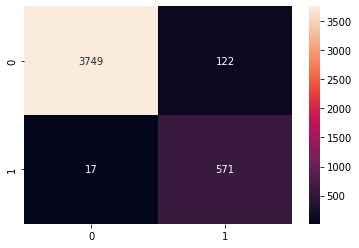

In [ ]:
sns.heatmap(confusion_matrix(np.array(train_y, int), np.array(train_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('BERT + FCN, train data', np.array(train_y, int), train_y_predict)

BERT + FCN, train data: : accuracy = 0.9688, precision = 0.8240, recall = 0.9711, f1 = 0.8915


##### Test report

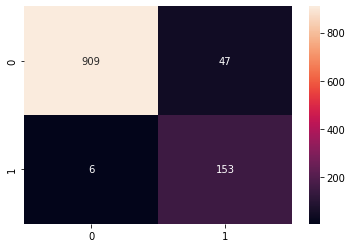

In [ ]:
sns.heatmap(confusion_matrix(np.array(test_y, int), np.array(test_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('BERT + FCN, test data', np.array(test_y, int), test_y_predict)

BERT + FCN, test data: : accuracy = 0.9525, precision = 0.7650, recall = 0.9623, f1 = 0.8524


#### BERT Analysis

In [ ]:
train_y_predict = train_y_predict.ravel()

In [ ]:
# spam examples
data['text'][data["spam"] == 1]

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
6091    Install, Play, CA$H Out! Easy Game, Easy Win! ...
6092    Y0U  SELECTED AS A F U/L L-T I/-M E EMPLOYEE W...
6093    Payday Promo!
40p is credited to your account ...
6094    Hello, you have received a sal a ry of 2787, y...
6095    Dear, please accept J.0B 0ffers from your frie...
Name: text, Length: 1269, dtype: string

In [ ]:
missclassified_text = train_X[train_y != train_y_predict]
missclassified_label = train_y[train_y != train_y_predict]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'missclassified_true_label': missclassified_label})

#df_report['missclassified_true_label'].value_counts()
df_report

,missclassified_text,missclassified_true_label
4330,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...,0
5771,My Grandfather smoked his whole life. I was ab...,1
410,Message:some text missing* Sender:Name Missing...,0
4200,"cmon babe, make me horny, *turn* me on! Txt me...",1
1353,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...,0
2774,How come it takes so little time for a child w...,1
4949,"Hi this is Amy, we will be sending you a free ...",1
3824,Please protect yourself from e-threats. SIB ne...,0
4659,This message is from a great Doctor in India:-...,0
2965,"Do you ever notice that when you're driving, a...",1


In [ ]:
train_X[train_y != train_y_predict].loc[1460]

'Bought one ringtone and now getting texts costing 3 pound offering more tones etc\n'

In [ ]:
df_report.loc[2965]

missclassified_text          Do you ever notice that when you're driving, a...
missclassified_true_label                                                    1
Name: 2965, dtype: object

In [ ]:
# TO-DO: Run models on just the UCI dataset to understand results

##### Baseline BERT observations
-----------------------------

As expected more text messages that were SPAM got classified as HAM because HAM is the majority class in our dataset.

I looked at a couple examples of texts that got misclassified as HAM and they're tricky to tell if it's a ham or spam messages. The 2 examples contained generic sayings that even a human could mistakenly classify as spam.


*Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur Soul Ur Guide And U Will Never loose in world....gnun - Sent via WAY2SMS.COM*

*1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cancer. 1Lemon/Day=No Fat. 1Cup Milk/day=No Bone Problms 3 Litres Watr/Day=No Diseases Snd ths 2 Whom U Care..:-)*


In general the misclassified messages are hard to tell for certain that they are ham or spam.


#### BERT + CNN

In [ ]:
def create_bert_cnn_model(train_layers=-1,
                          hidden_size = 100, 
                          learning_rate=0.00005,
                          num_filters = [100, 100, 50, 25],
                          kernel_sizes = [3, 5, 10, 20],
                          dense_layer_dims = 100,
                          dropout = 0.3):
    """
    Build a  classification model with BERT, where you apply CNN layers  to the BERT output
    """

    ### YOUR CODE HERE

    bert_model = TFBertModel.from_pretrained('bert-base-cased')

    # TO-DO: play around with restricting and not restricting BERT layers
    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in bert_model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False
    
    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer') 
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    # bert_inputs = {'input_ids': input_ids} 
    bert_inputs = {'input_ids': input_ids,
                'token_type_ids': token_type_ids,
                'attention_mask': attention_mask}      

    bert_out = bert_model(bert_inputs) 

    pooled_token = bert_out[0][:, 1:-1]

    # CNN -----

    conv_layers_for_all_kernel_sizes = []
    for kernel_size, filters in zip(kernel_sizes, num_filters):
        conv_layer = keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(pooled_token)
        conv_layer = keras.layers.GlobalMaxPooling1D()(conv_layer)
        conv_layers_for_all_kernel_sizes.append(conv_layer)

    h = keras.layers.concatenate(conv_layers_for_all_kernel_sizes, axis=1)
    #h = keras.layers.Dropout(rate=dropout)(h)

    h = tf.keras.layers.Dense(dense_layer_dims, activation='relu')(h)
    h = tf.keras.layers.Dropout(rate=dropout)(h) 

    # -----

    classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(h)

    # classification_model = tf.keras.Model(inputs=[input_ids], outputs=[classification])
    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])
    
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                            metrics='accuracy')


    ### END YOUR CODE
    
    return classification_model

In [ ]:
cnn_bert_model = create_bert_cnn_model()

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=1)  

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


558/558 [==============================] - 165s 225ms/step - loss: 0.0781 - accuracy: 0.9785 - val_loss: 0.1563 - val_accuracy: 0.9695


In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

##### Train report

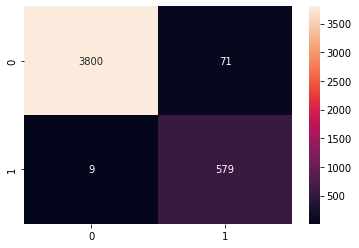

In [ ]:
sns.heatmap(confusion_matrix(np.array(train_y, int), np.array(train_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('BERT + CNN, train data: ', np.array(train_y, int), train_y_predict)

BERT + CNN, train data: : accuracy = 0.9821, precision = 0.8908, recall = 0.9847, f1 = 0.9354


##### Test report

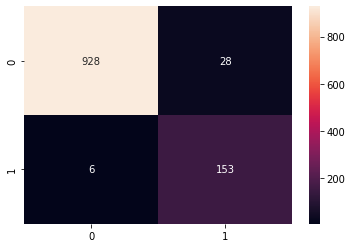

In [ ]:
sns.heatmap(confusion_matrix(np.array(test_y, int), np.array(test_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
print_metrics('BERT + CNN, test data: ', np.array(test_y, int), test_y_predict)

BERT + CNN, test data: : accuracy = 0.9695, precision = 0.8453, recall = 0.9623, f1 = 0.9000


## Tuned models

#### BERT tuning

**Experiment 1:** Increase the number of epochs because the training kept on improving in the first epoch and we may want to have a couple passes through the model in order to find the most optimal weights for this classification task. Also tune if freezing or unfreezing BERT layers will improve performance. I assume that unfreezing the layers may introduce too many parameters and the model will overfit. But we're expecting the number of epochs to increase performance.

In [ ]:
pooled_bert_model = create_bert_pooled_model()

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
pooled_bert_model_history = pooled_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=3)  

Epoch 1/3
558/558 [==============================] - 142s 210ms/step - loss: 0.0778 - accuracy: 0.9771 - val_loss: 0.0555 - val_accuracy: 0.9865
Epoch 2/3
558/558 [==============================] - 114s 204ms/step - loss: 0.0535 - accuracy: 0.9877 - val_loss: 0.0609 - val_accuracy: 0.9910
Epoch 3/3
558/558 [==============================] - 114s 204ms/step - loss: 0.0645 - accuracy: 0.9852 - val_loss: 0.0954 - val_accuracy: 0.9803


In [ ]:
train_predict_labels = pooled_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = train_predict_labels.round(0)

In [ ]:
test_predict_labels = pooled_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

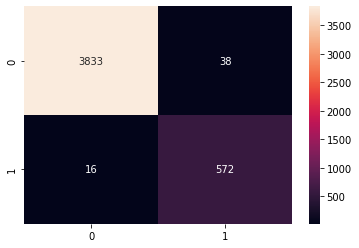

In [ ]:
# train
sns.heatmap(confusion_matrix(np.array(train_y, int), np.array(train_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

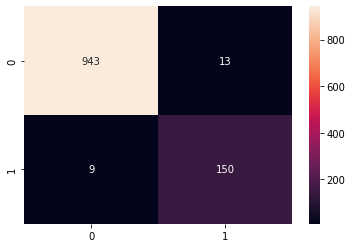

In [ ]:
# test
sns.heatmap(confusion_matrix(np.array(test_y, int), np.array(test_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
# train
print_metrics('BERT 3e + FCN, train data', np.array(train_y, int), train_y_predict)
# test
print_metrics('BERT 3e + FCN, test data', np.array(test_y, int), test_y_predict)

BERT 3e + FCN, train data: : accuracy = 0.9879, precision = 0.9377, recall = 0.9728, f1 = 0.9549


BERT 3e + FCN, test data: : accuracy = 0.9803, precision = 0.9202, recall = 0.9434, f1 = 0.9317


In [ ]:
# train
missclassified_text = train_X[train_y != train_y_predict.reshape(-1)]
missclassified_label = train_y[train_y != train_y_predict.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,true_label
5771,My Grandfather smoked his whole life. I was ab...,1
4141,Leave it wif me lar... Ü wan to carry meh so h...,0
4949,"Hi this is Amy, we will be sending you a free ...",1
1407,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...",1
4394,RECPT 1/3. You have ordered a Ringtone. Your o...,1
5372,dating:i have had two of these. Only started a...,1
2692,Hey tmr meet at bugis 930 ?,0
68,"Did you hear about the new ""Divorce Barbie""? I...",1
136,I only haf msn. It's yijue@hotmail.com,0
5768,"Come on in, feel free to do some looking.",1


In [ ]:
# test
missclassified_text = test_X[np.array(test_y, int) != test_y_predict.reshape(-1)]
missclassified_label = test_y[np.array(test_y, int) != test_y_predict.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,missclassified_true_label
5931,"Register a bonus, invite bonuses, and receive ...",1
5767,Stay a while 'cause somethings always cooking.,1
989,Yun ah.the ubi one say if ü wan call by tomorr...,0
5581,N/a,1
5963,"Download to get an exclusive bonus, the super ...",1
718,Book which lesson? then you msg me... I will c...,0
4298,thesmszone.com lets you send free anonymous an...,1
3864,Oh my god! I've found your number again! I'm s...,1
3991,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1
2823,ROMCAPspam Everyone around should be respondin...,1


**Experiment 1 Results:** As expected increasing number of epochs slightly improved the f1 score and accuracy. Running it on 3 epochs seemed like a good threshold as the loss function kept decresing but the accuracy stopped improving. We're getting pretty good results with only 18 text messages that got missclassfied from the test.

In [ ]:
# unfreeze layers
pooled_bert_model_unfreeze = create_bert_pooled_model(train_layers=1)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
pooled_bert_model_history = pooled_bert_model_unfreeze.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=3) 

Epoch 1/3
558/558 [==============================] - 75s 110ms/step - loss: 0.0925 - accuracy: 0.9682 - val_loss: 0.0398 - val_accuracy: 0.9892
Epoch 2/3
558/558 [==============================] - 54s 97ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0305 - val_accuracy: 0.9928
Epoch 3/3
558/558 [==============================] - 54s 97ms/step - loss: 0.0204 - accuracy: 0.9948 - val_loss: 0.0250 - val_accuracy: 0.9919


In [ ]:
train_predict_labels = pooled_bert_model_unfreeze.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = train_predict_labels.round(0)

In [ ]:
test_predict_labels = pooled_bert_model_unfreeze.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

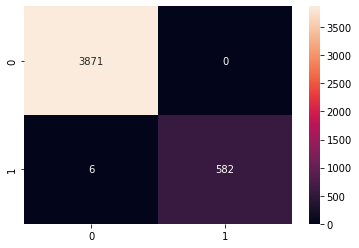

In [ ]:
# train
sns.heatmap(confusion_matrix(np.array(train_y, int), np.array(train_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

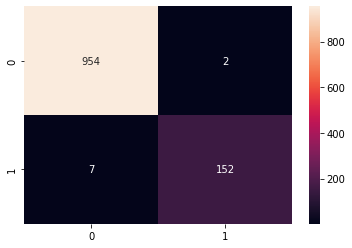

In [ ]:
# test
sns.heatmap(confusion_matrix(np.array(test_y, int), np.array(test_y_predict.reshape(-1), int)), annot=True, fmt='g')  #annot=True to annotate cells, ftm='g' to disable scientific notation

In [ ]:
# train
print_metrics('BERT 3e + FCN unfreeze, train data', np.array(train_y, int), train_y_predict)
# test
print_metrics('test data', np.array(test_y, int), test_y_predict)

BERT 3e + FCN unfreeze, train data: accuracy = 0.9987, precision = 1.0000, recall = 0.9898, f1 = 0.9949
test data: accuracy = 0.9919, precision = 0.9870, recall = 0.9560, f1 = 0.9712


In [ ]:
# test
missclassified_text = test_X[np.array(test_y, int) != test_y_predict.reshape(-1)]
missclassified_label = test_y[np.array(test_y, int) != test_y_predict.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,true_label
3094,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1...,0
2965,"Do you ever notice that when you're driving, a...",1
263,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,0
2663,Hello darling how are you today? I would love ...,1
1500,"SMS. ac JSco: Energy is high, but u may not kn...",1
4298,thesmszone.com lets you send free anonymous an...,1
5451,"Latest News! Police station toilet stolen, cop...",1
3530,Xmas & New Years Eve tickets are now on sale f...,1
3141,sexy sexy cum and text me im wet and warm and ...,1


**Experiment 1 Results:** Unfreezing the BERT model layers helped with increasing the F1 score to 0.9745 on running the model for 3 epochs. The performance on the training set was excellent which may mean that we're slightly overfitting. 

Because the performance kept improving we may try to run on a couple more epochs to see if overfitting becomes worse and see if we will hit lower performance on the validation set.

In [ ]:
# unfreeze layers
pooled_bert_model_unfreeze = create_bert_pooled_model(train_layers=1)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# change to 5 epochs
pooled_bert_model_history = pooled_bert_model_unfreeze.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                  y_train,   
                                                  validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                                  batch_size=8, 
                                                  epochs=5) 

Epoch 1/5
558/558 [==============================] - 70s 112ms/step - loss: 0.0707 - accuracy: 0.9780 - val_loss: 0.0374 - val_accuracy: 0.9865
Epoch 2/5
558/558 [==============================] - 54s 97ms/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0459 - val_accuracy: 0.9892
Epoch 3/5
558/558 [==============================] - 54s 98ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.0425 - val_accuracy: 0.9857
Epoch 4/5
558/558 [==============================] - 55s 99ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0303 - val_accuracy: 0.9910
Epoch 5/5
558/558 [==============================] - 54s 97ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0438 - val_accuracy: 0.9901


In [ ]:
train_predict_labels = pooled_bert_model_unfreeze.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = train_predict_labels.round(0)

In [ ]:
test_predict_labels = pooled_bert_model_unfreeze.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

In [ ]:
# test
missclassified_text = test_X[np.array(test_y, int) != test_y_predict.reshape(-1)]
missclassified_label = test_y[np.array(test_y, int) != test_y_predict.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,true_label
3094,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1...,0
2965,"Do you ever notice that when you're driving, a...",1
263,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,0
4252,Omg Joanna is freaking me out. She's looked th...,0
2663,Hello darling how are you today? I would love ...,1
4298,thesmszone.com lets you send free anonymous an...,1
2493,No drama Pls.i have had enough from you and fa...,0
5451,"Latest News! Police station toilet stolen, cop...",1
1638,"0A$NETWORKS allow companies to bill for SMS, s...",1
3432,Yeah if we do have to get a random dude we nee...,0


In [ ]:
# train
print_metrics('BERT 5e + FCN unfreeze, train data: ', np.array(train_y, int), train_y_predict)
# test
print_metrics('test data: ', np.array(test_y, int), test_y_predict)

BERT 5e + FCN unfreeze, train data: : accuracy = 0.9996, precision = 0.9966, recall = 1.0000, f1 = 0.9983
test data: : accuracy = 0.9901, precision = 0.9625, recall = 0.9686, f1 = 0.9655


**Experiment 1 Results:** Increasing the number of epochs to 5 has resulted in some overfitting, we see a degraded performance on the test set in F1 score and increase in the number of misclassified examples. As a result of this experiment BERT model with unfrozen layers and 3 epochs proved to produce really good results. 


#### BERT + CNN tuning

**Experiment 1:** Increase number of epochs and unfreeze BERT layers, not much improvement.

In [ ]:
cnn_bert_model = create_bert_cnn_model(train_layers=1)

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=3)  

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3


558/558 [==============================] - 79s 110ms/step - loss: 0.0589 - accuracy: 0.9800 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 2/3
558/558 [==============================] - 58s 104ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0316 - val_accuracy: 0.9910
Epoch 3/3
558/558 [==============================] - 58s 104ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0522 - val_accuracy: 0.9874


In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

In [ ]:
print_metrics('BERT + CNN, train data: ', np.array(train_y, int), train_y_predict)
print_metrics('test data: ', np.array(test_y, int), test_y_predict)

BERT + CNN, train data: : accuracy = 0.9960, precision = 0.9703, recall = 1.0000, f1 = 0.9849
BERT + CNN, test data: : accuracy = 0.9874, precision = 0.9290, recall = 0.9874, f1 = 0.9573


**Experiment 2:** Change kernel sizes, from lit review Roy et al. used the following kernel sizes. Kernel sizes improved the model. But now it overfits given that we're running it on 3 epochs.

In [ ]:
cnn_bert_model = create_bert_cnn_model(train_layers=1,
                                       kernel_sizes = [2, 3, 4, 5])

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=3)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
558/558 [==============================] - 74s 109ms/step - loss: 0.0660 - accuracy: 0.9773 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 2/3
558/558 [==============================] - 56s 101ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0289 - val_accuracy: 0.9919
Epoch 3/3
558/558 [==============================] - 52s 93ms/step - loss: 0.0176 - accuracy: 0.9935 - val_loss: 0.0376 - val_accuracy: 0.9901


In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

In [ ]:
print_metrics('BERT 3e + CNN kernel, train data: ', np.array(train_y, int), train_y_predict)
print_metrics('test data: ', np.array(test_y, int), test_y_predict)

BERT 3e + CNN kernel, train data: : accuracy = 0.9973, precision = 0.9800, recall = 1.0000, f1 = 0.9899
test data: : accuracy = 0.9901, precision = 0.9568, recall = 0.9748, f1 = 0.9657


**Experiment 3:** Decrease the number of filters to offset overfitting and possibly increase performance

In [ ]:
cnn_bert_model = create_bert_cnn_model(train_layers=1,
                                       kernel_sizes = [2, 3, 4, 5],
                                       num_filters = [32,64,128])

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=3)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3


558/558 [==============================] - 68s 107ms/step - loss: 0.0726 - accuracy: 0.9769 - val_loss: 0.0379 - val_accuracy: 0.9901
Epoch 2/3
558/558 [==============================] - 57s 101ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0784 - val_accuracy: 0.9758
Epoch 3/3
558/558 [==============================] - 57s 102ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0391 - val_accuracy: 0.9901


In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

print_metrics('BERT + CNN, train data: ', np.array(train_y, int), train_y_predict)
print_metrics('BERT + CNN, test data: ', np.array(test_y, int), test_y_predict)

**Experiment 4:** Run on 2 epochs this supposed to be the best performing BERT + CNN

In [ ]:
cnn_bert_model = create_bert_cnn_model(train_layers=1,
                                       kernel_sizes = [2, 3, 4, 5])

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=2)

In [ ]:
predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
train_y_predict = predict_labels.round(0)
test_predict_labels = cnn_bert_model.predict([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask])
test_y_predict = test_predict_labels.round(0)

print_metrics('BERT + CNN, train data: ', np.array(train_y, int), train_y_predict)
print_metrics('BERT + CNN, test data: ', np.array(test_y, int), test_y_predict)

#### Cross-validation

##### BERT + FCN 5e

In [ ]:
len(train_X)

4459

In [ ]:
CROSS_VAL = 5
FOLD_SIZE = 891

In [ ]:
for i in range(CROSS_VAL):
  max_length = 100              # set max_length

  all_train_examples = list(train_X.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]])
  all_val_examples = list(train_X[FOLD_SIZE*i:FOLD_SIZE*(i+1)])
  all_test_examples = list(test_X)

  x_train = bert_tokenizer(all_train_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_train = tf.convert_to_tensor(list(train_y.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]]))

  x_test = bert_tokenizer(all_test_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_test = tf.convert_to_tensor(list(test_y))

  x_val = bert_tokenizer(all_val_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_val = tf.convert_to_tensor(list(train_y[FOLD_SIZE*i:FOLD_SIZE*(i+1)]))

  # unfreeze layers
  pooled_bert_model_unfreeze = create_bert_pooled_model(train_layers=1)

  # change to 5 epochs
  pooled_bert_model_history = pooled_bert_model_unfreeze.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                                    y_train,   
                                                    validation_data=([x_val.input_ids, x_val.token_type_ids, x_val.attention_mask], y_val),    
                                                    batch_size=8, 
                                                    epochs=5) 

  train_predict_labels = pooled_bert_model_unfreeze.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
  train_y_predict = train_predict_labels.round(0)

  val_predict_labels = pooled_bert_model_unfreeze.predict([x_val.input_ids, x_val.token_type_ids, x_val.attention_mask])
  val_y_predict = val_predict_labels.round(0)

  # train
  print_metrics('BERT 5e + FCN, train', np.array(train_y.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]], int), train_y_predict)
  # validation
  print_metrics('BERT 5e + FCN, validation', np.array(train_y[FOLD_SIZE*i:FOLD_SIZE*(i+1)], int), val_y_predict)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5
446/446 [==============================] - 57s 104ms/step - loss: 0.0810 - accuracy: 0.9725 - val_loss: 0.0442 - val_accuracy: 0.9865
Epoch 2/5
446/446 [==============================] - 44s 98ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0955 - val_accuracy: 0.9663
Epoch 3/5
446/446 [==============================] - 43s 96ms/step - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0253 - val_accuracy: 0.9933
Epoch 4/5
446/446 [==============================] - 44s 99ms/step - loss: 0.0092 - accuracy: 0.9980 - val_loss: 0.0341 - val_accuracy: 0.9933
Epoch 5/5
446/446 [==============================] - 43s 97ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0282 - val_accuracy: 0.9921
BERT 5e + FCN, train: accuracy = 0.9992, precision = 0.9957, recall = 0.9979, f1 = 0.9968
BERT 5e + FCN, validation: accuracy = 0.9921, precision = 0.9669, recall = 0.9750, f1 = 0.9710


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5
446/446 [==============================] - 57s 106ms/step - loss: 0.0942 - accuracy: 0.9691 - val_loss: 0.0336 - val_accuracy: 0.9910
Epoch 2/5
446/446 [==============================] - 43s 97ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.0279 - val_accuracy: 0.9933
Epoch 3/5
446/446 [==============================] - 43s 96ms/step - loss: 0.0159 - accuracy: 0.9958 - val_loss: 0.0346 - val_accuracy: 0.9921
Epoch 4/5
446/446 [==============================] - 43s 97ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0264 - val_accuracy: 0.9899
Epoch 5/5
446/446 [==============================] - 43s 97ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0352 - val_accuracy: 0.9944
BERT 5e + FCN, train: accuracy = 1.0000, precision = 1.0000, recall = 1.0000, f1 = 1.0000
BERT 5e + FCN, validation: accuracy = 0.9944, precision = 1.0000, recall = 0.9569, f1 = 0.9780


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5
446/446 [==============================] - 56s 106ms/step - loss: 0.1043 - accuracy: 0.9604 - val_loss: 0.0369 - val_accuracy: 0.9854
Epoch 2/5
446/446 [==============================] - 43s 97ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.0393 - val_accuracy: 0.9877
Epoch 3/5
446/446 [==============================] - 43s 96ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 4/5
446/446 [==============================] - 43s 97ms/step - loss: 0.0118 - accuracy: 0.9952 - val_loss: 0.0348 - val_accuracy: 0.9910
Epoch 5/5
446/446 [==============================] - 43s 96ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0401 - val_accuracy: 0.9921
BERT 5e + FCN, train: accuracy = 0.9994, precision = 1.0000, recall = 0.9956, f1 = 0.9978
BERT 5e + FCN, validation: accuracy = 0.9921, precision = 0.9919, recall = 0.9531, f1 = 0.9721


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5
446/446 [==============================] - 57s 106ms/step - loss: 0.0831 - accuracy: 0.9725 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 2/5
446/446 [==============================] - 43s 96ms/step - loss: 0.0286 - accuracy: 0.9919 - val_loss: 0.0369 - val_accuracy: 0.9854
Epoch 3/5
446/446 [==============================] - 44s 98ms/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.0415 - val_accuracy: 0.9899
Epoch 4/5
446/446 [==============================] - 43s 96ms/step - loss: 0.0084 - accuracy: 0.9983 - val_loss: 0.0362 - val_accuracy: 0.9888
Epoch 5/5
446/446 [==============================] - 44s 98ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0406 - val_accuracy: 0.9877
BERT 5e + FCN, train: accuracy = 0.9989, precision = 0.9937, recall = 0.9979, f1 = 0.9958
BERT 5e + FCN, validation: accuracy = 0.9877, precision = 0.9412, recall = 0.9655, f1 = 0.9532


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/5
446/446 [==============================] - 58s 107ms/step - loss: 0.1139 - accuracy: 0.9574 - val_loss: 0.0203 - val_accuracy: 0.9955
Epoch 2/5
446/446 [==============================] - 43s 97ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.0167 - val_accuracy: 0.9944
Epoch 3/5
446/446 [==============================] - 55s 124ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0250 - val_accuracy: 0.9933
Epoch 4/5
446/446 [==============================] - 47s 105ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0192 - val_accuracy: 0.9933
Epoch 5/5
446/446 [==============================] - 44s 98ms/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.0213 - val_accuracy: 0.9955
BERT 5e + FCN, train: accuracy = 0.9964, precision = 0.9756, recall = 0.9979, f1 = 0.9866
BERT 5e + FCN, validation: accuracy = 0.9955, precision = 0.9725, recall = 0.9907, f1 = 0.9815


accuracy = 0.9921, precision = 0.9669, recall = 0.9750, f1 = 0.9710

accuracy = 0.9944, precision = 1.0000, recall = 0.9569, f1 = 0.9780

accuracy = 0.9921, precision = 0.9919, recall = 0.9531, f1 = 0.9721

accuracy = 0.9877, precision = 0.9412, recall = 0.9655, f1 = 0.9532

accuracy = 0.9955, precision = 0.9725, recall = 0.9907, f1 = 0.9815

In [ ]:
# cross validation results
cross_val_acc = [0.9921, 0.9944, 0.9921, 0.9877,0.9955]
cross_val_precision = []
cross_val_recall = []
cross_val_f1 = [0.9710, 0.9780, 0.9721, 0.9532,0.9815]

print("mean accuracy", np.mean(cross_val_acc))
print("mean f1", np.mean(cross_val_f1))

print("st dev accuracy", np.std(cross_val_acc))
print("se dev f1", np.std(cross_val_f1))

mean accuracy 0.99236
mean f1 0.97116
st dev accuracy 0.0026785070468453103
se dev f1 0.009769053178276785


##### BERT + CNN 3e un kernel

In [ ]:
for i in range(CROSS_VAL):
  max_length = 100                # set max_length

  all_train_examples = list(train_X.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]])
  all_val_examples = list(train_X[FOLD_SIZE*i:FOLD_SIZE*(i+1)])
  all_test_examples = list(test_X)

  x_train = bert_tokenizer(all_train_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_train = tf.convert_to_tensor(list(train_y.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]]))

  x_test = bert_tokenizer(all_test_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_test = tf.convert_to_tensor(list(test_y))

  x_val = bert_tokenizer(all_val_examples, 
                max_length=max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')

  y_val = tf.convert_to_tensor(list(train_y[FOLD_SIZE*i:FOLD_SIZE*(i+1)]))

  cnn_bert_model = create_bert_cnn_model(train_layers=1,
                                       kernel_sizes = [2, 3, 4, 5])

  cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=3)



  train_predict_labels = cnn_bert_model.predict([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask])
  train_y_predict = train_predict_labels.round(0)

  val_predict_labels = cnn_bert_model.predict([x_val.input_ids, x_val.token_type_ids, x_val.attention_mask])
  val_y_predict = val_predict_labels.round(0)

  # train
  print_metrics('BERT 3e + CNN kernel un, train', np.array(train_y.iloc[np.r_[0:FOLD_SIZE*i,FOLD_SIZE*(i+1):FOLD_SIZE*5]], int), train_y_predict)
  # validation
  print_metrics('validation', np.array(train_y[FOLD_SIZE*i:FOLD_SIZE*(i+1)], int), val_y_predict)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
446/446 [==============================] - 68s 117ms/step - loss: 0.0755 - accuracy: 0.9728 - val_loss: 0.0463 - val_accuracy: 0.9892
Epoch 2/3
446/446 [==============================] - 48s 109ms/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.0288 - val_accuracy: 0.9928
Epoch 3/3
446/446 [==============================] - 47s 106ms/step - loss: 0.0153 - accuracy: 0.9938 - val_loss: 0.0294 - val_accuracy: 0.9937
BERT 3e + CNN kernel un, train: accuracy = 0.9997, precision = 1.0000, recall = 0.9979, f1 = 0.9989
validation: accuracy = 0.9944, precision = 0.9915, recall = 0.9667, f1 = 0.9789


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
446/446 [==============================] - 61s 115ms/step - loss: 0.0858 - accuracy: 0.9689 - val_loss: 0.0509 - val_accuracy: 0.9874
Epoch 2/3
446/446 [==============================] - 48s 108ms/step - loss: 0.0269 - accuracy: 0.9930 - val_loss: 0.0277 - val_accuracy: 0.9937
Epoch 3/3
446/446 [==============================] - 47s 106ms/step - loss: 0.0166 - accuracy: 0.9952 - val_loss: 0.0281 - val_accuracy: 0.9910
BERT 3e + CNN kernel un, train: accuracy = 0.9994, precision = 0.9979, recall = 0.9979, f1 = 0.9979
validation: accuracy = 0.9910, precision = 0.9909, recall = 0.9397, f1 = 0.9646


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
446/446 [==============================] - 62s 115ms/step - loss: 0.0779 - accuracy: 0.9739 - val_loss: 0.0307 - val_accuracy: 0.9901
Epoch 2/3
446/446 [==============================] - 48s 108ms/step - loss: 0.0272 - accuracy: 0.9896 - val_loss: 0.0303 - val_accuracy: 0.9892
Epoch 3/3
446/446 [==============================] - 47s 106ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0333 - val_accuracy: 0.9910
BERT 3e + CNN kernel un, train: accuracy = 0.9989, precision = 0.9935, recall = 0.9978, f1 = 0.9957
validation: accuracy = 0.9921, precision = 0.9690, recall = 0.9766, f1 = 0.9728


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
446/446 [==============================] - 62s 119ms/step - loss: 0.0879 - accuracy: 0.9697 - val_loss: 0.0376 - val_accuracy: 0.9874
Epoch 2/3
446/446 [==============================] - 48s 108ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0336 - val_accuracy: 0.9928
Epoch 3/3
446/446 [==============================] - 47s 106ms/step - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.0341 - val_accuracy: 0.9928
BERT 3e + CNN kernel un, train: accuracy = 0.9992, precision = 1.0000, recall = 0.9936, f1 = 0.9968
validation: accuracy = 0.9933, precision = 1.0000, recall = 0.9483, f1 = 0.9735


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
446/446 [==============================] - 62s 118ms/step - loss: 0.0803 - accuracy: 0.9733 - val_loss: 0.0288 - val_accuracy: 0.9910
Epoch 2/3
446/446 [==============================] - 49s 109ms/step - loss: 0.0226 - accuracy: 0.9935 - val_loss: 0.0734 - val_accuracy: 0.9758
Epoch 3/3
446/446 [==============================] - 48s 107ms/step - loss: 0.0195 - accuracy: 0.9927 - val_loss: 0.0364 - val_accuracy: 0.9919
BERT 3e + CNN kernel un, train: accuracy = 0.9992, precision = 0.9938, recall = 1.0000, f1 = 0.9969
validation: accuracy = 0.9955, precision = 0.9813, recall = 0.9813, f1 = 0.9813


accuracy = 0.9944, precision = 0.9915, recall = 0.9667, f1 = 0.9789

accuracy = 0.9910, precision = 0.9909, recall = 0.9397, f1 = 0.9646

accuracy = 0.9921, precision = 0.9690, recall = 0.9766, f1 = 0.9728

accuracy = 0.9933, precision = 1.0000, recall = 0.9483, f1 = 0.9735

accuracy = 0.9955, precision = 0.9813, recall = 0.9813, f1 = 0.9813

In [ ]:
# cross validation results
cross_val_acc = [0.9944,0.9910,0.9921,0.9933,0.9955]
cross_val_precision = []
cross_val_recall = []
cross_val_f1 = [0.9789, 0.9646, 0.9728, 0.9735, 0.9813]

print("mean accuracy", np.mean(cross_val_acc))
print("mean f1", np.mean(cross_val_f1))

print("st dev accuracy", np.std(cross_val_acc))
print("se dev f1", np.std(cross_val_f1))

mean accuracy 0.99326
mean f1 0.9742200000000001
st dev accuracy 0.0015982490419205759
se dev f1 0.0057811417557433915


#### Train on just UCI and test on both

In [ ]:
data_all = pd.read_csv("/content/drive/MyDrive/W266: SMS Spam Detection Final Project/data/data_clean_trans.csv")
data_all

,Unnamed: 0,spam,text,crowd,spanish,language,english
0,0,0,"Go until jurong point, crazy.. Available only ...",0,"Vaya hasta Jurong Point, loco ... disponible s...",en,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...\n,0,Ok lar ... bromeando wif u oni ...\n,en,Ok lar... Joking wif u oni...\n
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,Entrada gratuita en 2 una compensación de wkly...,en,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...,0,No digo tan temprano hor ... ya c ya digo ...\n,en,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro...",0,"No, no creo que vaya a la USF, aunque vive por...",en,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...
6102,6102,1,You have passed the official certification onl...,1,Ha aprobado la certificación oficial de la aud...,en,You have passed the official certification onl...
6103,6103,1,"Win The Big J@CKP0T Up To 1M PHP! 100 GET 100,...",1,¡Gana la gran j@ckp0t hasta 1 m php! 100 Get 1...,en,"Win The Big J@CKP0T Up To 1M PHP! 100 GET 100,..."
6104,6104,1,"Hi, I'm a Shopee Hiring Manager and I'm curren...",1,"Hola, soy un gerente de contratación de Shopee...",en,"Hi, I'm a Shopee Hiring Manager and I'm curren..."
6105,6105,1,"4 PCS SOLAR LIGHTS FOR ONLY 1,499 !\nPinaka mu...",1,"¡4 PCS Luces solares por solo 1,499!\n¡La mayo...",fil,"4 pcs solar lights for only 1,499!\nMost cheap..."


In [ ]:
X, y = data_all['text'], data_all['spam']

train_X_all, test_X_all, train_y_all, test_y_all = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    shuffle=True)

In [ ]:
all_test_examples_all = list(test_X_all)


x_test_all = bert_tokenizer(all_test_examples_all, 
              max_length=max_length,
              truncation=True,
              padding='max_length', 
              return_tensors='tf')

y_test_all = tf.convert_to_tensor(list(test_y_all))

In [ ]:
cnn_bert_model = create_bert_cnn_model(train_layers=1,
                                       kernel_sizes = [2, 3, 4, 5])

cnn_bert_model_history = cnn_bert_model.fit([x_train.input_ids, x_train.token_type_ids, x_train.attention_mask], 
                                            y_train,   
                                            validation_data=([x_test.input_ids, x_test.token_type_ids, x_test.attention_mask], y_test),    
                                            batch_size=8, 
                                            epochs=3)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
558/558 [==============================] - 61s 90ms/step - loss: 0.0801 - accuracy: 0.9726 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 2/3
558/558 [==============================] - 48s 85ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0367 - val_accuracy: 0.9910
Epoch 3/3
558/558 [==============================] - 47s 84ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0364 - val_accuracy: 0.9928


In [ ]:
test_predict_labels_all = cnn_bert_model.predict([x_test_all.input_ids, x_test_all.token_type_ids, x_test_all.attention_mask])
test_y_predict_all = test_predict_labels_all.round(0)

print_metrics('test data: ', np.array(test_y_all, int), test_y_predict_all)

test data: : accuracy = 0.9820, precision = 0.9918, recall = 0.9240, f1 = 0.9567


In [ ]:
# test
missclassified_text = test_X_all[np.array(test_y_all, int) != test_y_predict_all.reshape(-1)]
missclassified_label = test_y_all[np.array(test_y_all, int) != test_y_predict_all.reshape(-1)]

df_report = pd.DataFrame({'missclassified_text': missclassified_text, 'true_label': missclassified_label})

df_report

,missclassified_text,true_label
5704,Makakatanggap ka ng 5000 cash! Pumunta lang sa...,1
5667,Keep safe and let me assist you to have a CÀSH...,1
5738,Hi! Wànt to àvàil Our Pèrsonàl Loàn? Fàst & eà...,1
2663,Hello darling how are you today? I would love ...,1
5701,"Sino gusto matampal ng 5M, ako din char! Tara ...",1
5996,Pinas Baon na sa 11.6 Trilyon utang sa 5 taon ...,1
263,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,0
5914,Hi'im Ram offering Personal cashloan for Empl...,1
5581,N/a,1
5783,50k - 2M is the offer just inquire now get it ...,1
